In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.close("all")

In [2]:
def get_single_deviation(_compare_method: str, _theta, _human_seed):
    base_dir = "./result/seed3333/compare_{}/threshold{}/human_seed{}".format(_compare_method, _theta, _human_seed)
    deviation_file = base_dir + "/" + "deviation_record3333_{}.csv".format(_human_seed)
    with open(deviation_file) as f:
        f_csv = csv.reader(f)
        first_line = next(f_csv)  # read first line
        _dev_list = list(map(int, first_line))
    return _dev_list

In [3]:
def calc_deviation_interval(_dev_list):
    assert(len(_dev_list) > 1)

    _interval_list = [_dev_list[0]]
    for i in range(1, len(_dev_list) - 1):  # remove the final 1000
        _interval = _dev_list[i] - _dev_list[i-1]
        _interval_list.append(_interval)
    return _interval_list



In [4]:
def get_deviation_by_threshold(_compare_method, _threshold, _human_seed_list):
    #print("For " + _compare_method)
    _dev_list = []
    for seed in _human_seed_list:
        _dev_list.append(get_single_deviation(_compare_method, _threshold, seed))
    return _dev_list

In [5]:
def get_single_statistics(_compare_method: str, _theta, _human_seed):
    base_dir = "./result/seed3333/compare_{}/threshold{}/human_seed{}".format(_compare_method, _theta, _human_seed)
    archive_file = base_dir + "/" + "all_distances_3333_{}.csv".format(_human_seed)
    df = pd.read_csv(archive_file)
    return df
    # print(df[['baseline', 'global_goal', 'interaction', 'local_goals']].mean())
    # print(df[['baseline', 'global_goal', 'interaction', 'local_goals']].std())

In [6]:
# get all random traces of the same threshold
def get_statistics_by_threshold(_compare_method, _threshold, _human_seed_list):
    #print("For " + _compare_method)
    _df_list = []
    for seed in _human_seed_list:
        _df_list.append(get_single_statistics(_compare_method, _threshold, seed))
    return _df_list

In [7]:
compare_method_list = ["baseline", "interaction", "local_goals", "global_goal"]
metric_list =         ["baseline", "interaction", "local_goals", "global_goal"]
#human_seed_list = list(range(100, 2001, 100))
threshold_list = [30, 40]


position
109.2354755
96.64522425000001
121.3248185
interaction
99.5138335
85.24860525
113.3496525
local_goals
0.387298
0.0
0.860233
global_goal
0.1
0.05
0.2


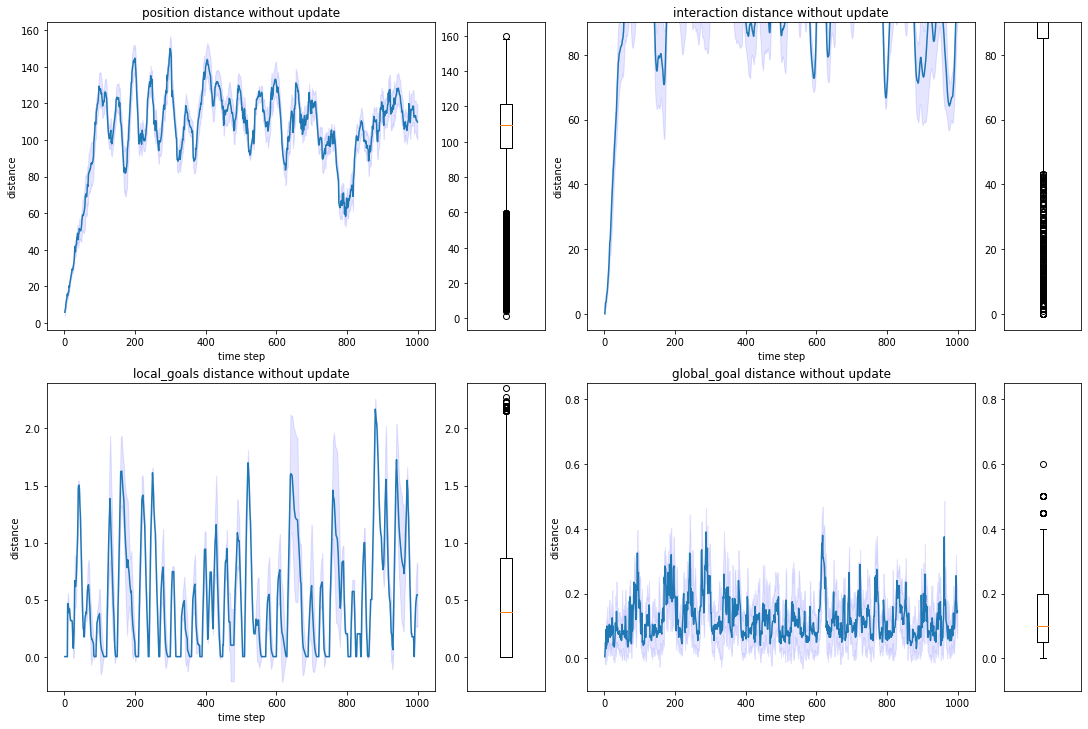

In [12]:
# if no update on digital twin is performed
human_seed_list = list(range(100, 1001, 100))
threshold = 10000

#fig0, ax0 = plt.subplots(2, 4, figsize=(15, 25))

fig0 = plt.figure(constrained_layout=True,figsize=(15, 10))
widths = [5, 1, 5, 1]
heights = [1, 1]
spec0 = fig0.add_gridspec(ncols=4, nrows=2, width_ratios=widths,
                          height_ratios=heights)


fig0.patch.set_facecolor('w')


for i in [0,1]:
    for j in [0,1]:
        metric = metric_list[2*i+j]

        df_list = get_statistics_by_threshold("baseline", threshold, human_seed_list)

        distance_list = [df[metric] for df in df_list]
        result = pd.concat(distance_list, axis=1, join="inner")
        times = df_list[0]["# time"]

        # https://stackoverflow.com/questions/50161140/how-to-plot-a-time-series-array-with-confidence-intervals-displayed-in-python
        result_mean = result.mean(axis=1)
        path_deviation = result.std(axis=1)
        under_line = result_mean - path_deviation
        over_line = result_mean + path_deviation

        ax00 = fig0.add_subplot(spec0[i, 2*j])
        ax01 = fig0.add_subplot(spec0[i, 2*j+1])

        if metric == 'baseline':
            metric = 'position'
        ax00.set_title("{} distance without update".format(metric))
        ax00.set_xlabel("time step")
        ax00.set_ylabel("distance")
        ax00.plot(times, result_mean)
        ax00.fill_between(times, under_line, over_line, color='b', alpha=.1)

        tmp = pd.concat(distance_list)
        print(metric)
        print(tmp.median())
        print(tmp.quantile(0.25))
        print(tmp.quantile(0.75))

        #ax01.set_title('overall {} distance without update'.format(metric))
        ax01.boxplot(pd.concat(distance_list, axis=0))
        ax01.get_xaxis().set_visible(False)

        if metric == "baseline": #, , "local_goals", "global_goal"
            ax00.set_ylim([-5, 140])
            ax01.set_ylim([-5, 140])
        elif metric == "interaction":
            ax00.set_ylim([-5, 90])
            ax01.set_ylim([-5, 90])
        elif metric == "local_goals":
            ax00.set_ylim([-0.3, 2.4])
            ax01.set_ylim([-0.3, 2.4])
        elif metric == "global_goal":
            ax00.set_ylim([-0.1, 0.85])
            ax01.set_ylim([-0.1, 0.85])

fig0.savefig("./fig/no_update.pdf")


25.503006614814815
10.060491125478668


<ipython-input-200-f3b0429c33a3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(human_seed_list)


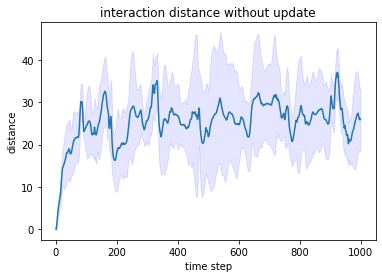

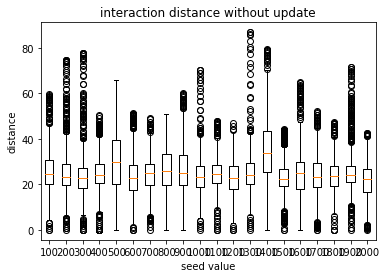

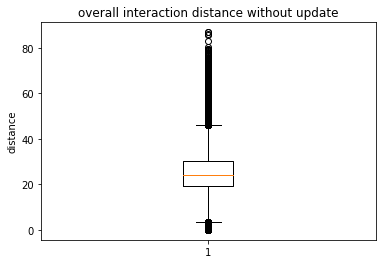

In [200]:
# if no update on digital twin is performed
compare_method = "baseline"
threshold = 10000
df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

distance_list = [df["interaction"] for df in df_list]
result = pd.concat(distance_list, axis=1, join="inner")
times = df_list[0]["# time"]

# https://stackoverflow.com/questions/50161140/how-to-plot-a-time-series-array-with-confidence-intervals-displayed-in-python
result_mean = result.mean(axis=1)
path_deviation = result.std(axis=1)
under_line = result_mean - path_deviation
over_line = result_mean + path_deviation

plt.figure(facecolor='w')
plt.title("interaction distance without update")
plt.xlabel("time step")
plt.ylabel("distance")
plt.plot(times, result_mean)  # mean curve
plt.fill_between(times, under_line, over_line, color='b', alpha=.1) #std curves.
plt.savefig("./fig/no_update_interaction_1.pdf")

tmp = pd.concat(distance_list)
print(tmp.mean())
print(tmp.std())

fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('interaction distance without update')
ax0.set_xticklabels(human_seed_list)
ax0.set_xlabel('seed value')
ax0.set_ylabel("distance")
ax0.boxplot(result)
plt.savefig("./fig/no_update_interaction_2.pdf")

fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('overall interaction distance without update')
ax0.set_ylabel("distance")
ax0.boxplot(pd.concat(distance_list, axis=0))
plt.savefig("./fig/no_update_interaction_3.pdf")


0.7285957048048048
0.5390522123272916


<ipython-input-59-780d75304fd2>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(human_seed_list)


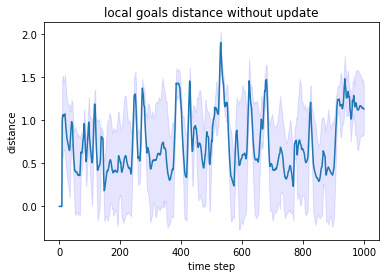

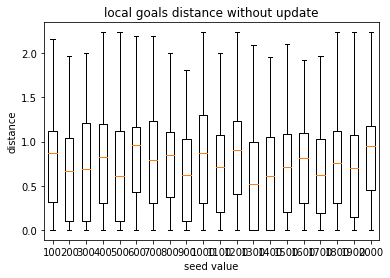

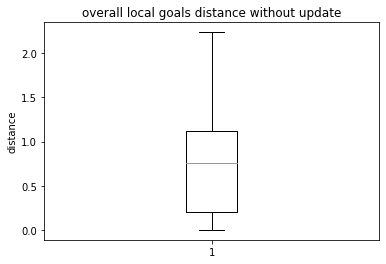

In [59]:
# if no update on digital twin is performed
compare_method = "baseline"
threshold = 10000
df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

distance_list = [df["local_goals"] for df in df_list]
result = pd.concat(distance_list, axis=1, join="inner")
times = df_list[0]["# time"]

# https://stackoverflow.com/questions/50161140/how-to-plot-a-time-series-array-with-confidence-intervals-displayed-in-python
result_mean = result.mean(axis=1)
path_deviation = result.std(axis=1)
under_line = result_mean - path_deviation
over_line = result_mean + path_deviation

plt.figure(facecolor='w')
plt.title("local goals distance without update")
plt.xlabel("time step")
plt.ylabel("distance")
plt.plot(times, result_mean)  # mean curve
plt.fill_between(times, under_line, over_line, color='b', alpha=.1) #std curves.
plt.savefig("./fig/no_update_local_goals_1.pdf")

tmp = pd.concat(distance_list)
print(tmp.mean())
print(tmp.std())


fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('local goals distance without update')
ax0.set_xticklabels(human_seed_list)
ax0.set_xlabel('seed value')
ax0.set_ylabel("distance")
ax0.boxplot(result)
plt.savefig("./fig/no_update_local_goals_2.pdf")

fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('overall local goals distance without update')
ax0.set_ylabel("distance")
ax0.boxplot(pd.concat(distance_list, axis=0))
plt.savefig("./fig/no_update_local_goals_3.pdf")


0.18539539539539543
0.16109676780073665


<ipython-input-60-03edcc8224bf>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(human_seed_list)


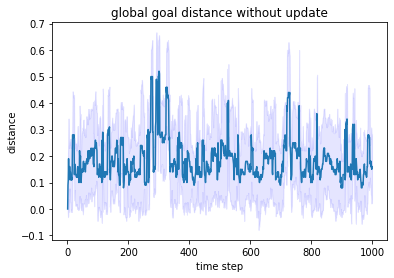

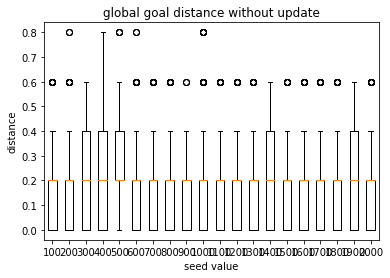

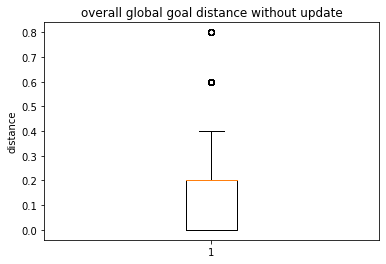

In [60]:
# if no update on digital twin is performed
compare_method = "baseline"
threshold = 10000
df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

distance_list = [df["global_goal"] for df in df_list]
result = pd.concat(distance_list, axis=1, join="inner")
times = df_list[0]["# time"]

# https://stackoverflow.com/questions/50161140/how-to-plot-a-time-series-array-with-confidence-intervals-displayed-in-python
result_mean = result.mean(axis=1)
path_deviation = result.std(axis=1)
under_line = result_mean - path_deviation
over_line = result_mean + path_deviation

plt.figure(facecolor='w')
plt.title("global goal distance without update")
plt.xlabel("time step")
plt.ylabel("distance")
plt.plot(times, result_mean)  # mean curve
plt.fill_between(times, under_line, over_line, color='b', alpha=.1) #std curves.
plt.savefig("./fig/no_update_global_goal_1.pdf")

tmp = pd.concat(distance_list)
print(tmp.mean())
print(tmp.std())


fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('global goal distance without update')
ax0.set_xticklabels(human_seed_list)
ax0.set_xlabel('seed value')
ax0.set_ylabel("distance")
ax0.boxplot(result)
plt.savefig("./fig/no_update_global_goal_2.pdf")


fig0, ax0 = plt.subplots()
fig0.patch.set_facecolor('w')
ax0.set_title('overall global goal distance without update')
ax0.set_ylabel("distance")
ax0.boxplot(pd.concat(distance_list, axis=0))
plt.savefig("./fig/no_update_global_goal_3.pdf")


update intervals of threshold 60


<ipython-input-10-9e4b269b9762>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(threshold_list)
<ipython-input-10-9e4b269b9762>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-10-9e4b269b9762>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-10-9e4b269b9762>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-10-9e4b269b9762>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)


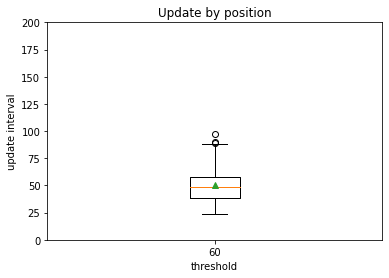

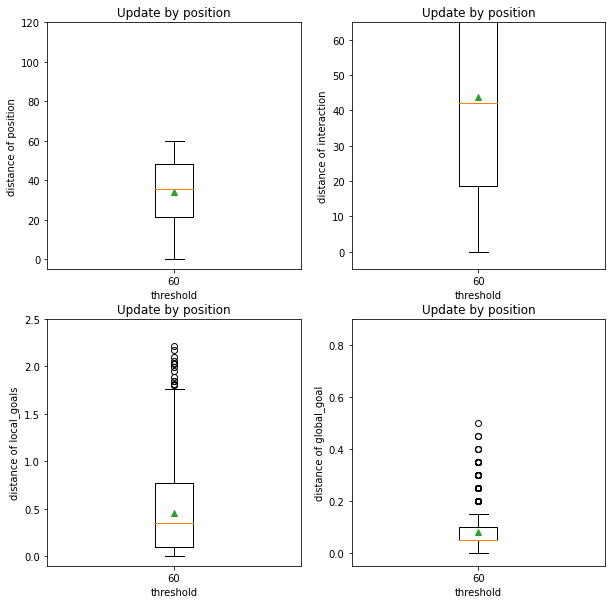

In [10]:
# update by position distance
# analyse overhead for each threshold
compare_method = "baseline"
human_seed_list = list(range(100, 401, 100))
threshold_list = [60]

interval_data = []
for threshold in threshold_list:
    print("update intervals of threshold {}".format(threshold))

    dev_list = get_deviation_by_threshold(compare_method, threshold, human_seed_list)
    interval_list = list(map(calc_deviation_interval, dev_list))

    # concat all update intervals
    all_intervals = []
    for ii in interval_list:
        all_intervals += ii
    interval_data.append(all_intervals)
    # print(np.mean(all_intervals))
    # print(np.std(all_intervals, ddof=1))

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('w')
ax1.set_title('Update by position')
ax1.set_xticklabels(threshold_list)
ax1.set_xlabel('threshold')
ax1.set_ylabel('update interval')
ax1.set_ylim([0,200])
ax1.boxplot(interval_data, showmeans=True)
plt.savefig("./fig/{}_interval.pdf".format('position'))


# update by baseline distance
# analyse distance for each threshold
fig2, axs2 = plt.subplots(2,2, figsize=(10,10))
fig2.patch.set_facecolor('w')
i = 0
for dist_type in compare_method_list:
    result_list = []

    for threshold in threshold_list:
        # time-series distances from all different seeds
        df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

        # retrieve only a certain type of distance
        distance_list = [df[dist_type] for df in df_list]
        result = pd.concat(distance_list, axis=0)
        result_list.append(result)
    if dist_type == 'baseline':
        dist_type = 'position'
    axs2[i//2,i % 2].set_title('Update by position')
    axs2[i//2,i % 2].set_xticklabels(threshold_list)
    axs2[i//2,i % 2].set_xlabel("threshold")
    axs2[i//2,i % 2].set_ylabel("distance of {}".format(dist_type))
    axs2[i//2,i % 2].boxplot(result_list, showmeans=True)
    i = i + 1
axs2[0,0].set_ylim([-5,120])
axs2[0,1].set_ylim([-5,65])
axs2[1,0].set_ylim([-0.1,2.5])
axs2[1,1].set_ylim([-0.05,0.9])
plt.savefig("./fig/{}_distances.pdf".format('position'))


update intervals of threshold 50


<ipython-input-11-6dc3c629feef>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(threshold_list)
<ipython-input-11-6dc3c629feef>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-11-6dc3c629feef>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-11-6dc3c629feef>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-11-6dc3c629feef>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)


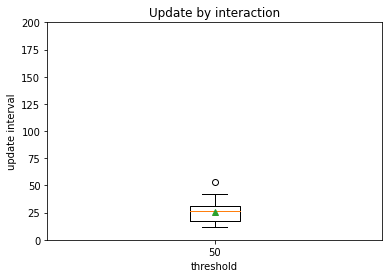

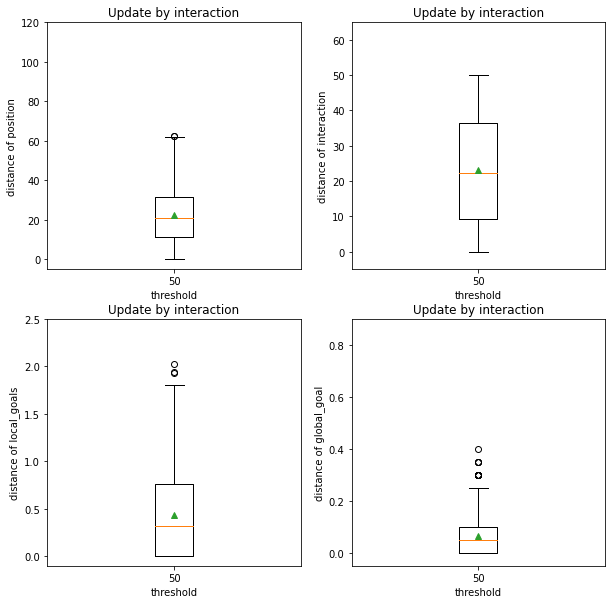

In [11]:
# update by interaction distance
# analyse overhead for each threshold
compare_method = "interaction"
human_seed_list = list(range(100, 101 , 100))
threshold_list = [50]

interval_data = []
for threshold in threshold_list:
    print("update intervals of threshold {}".format(threshold))

    dev_list = get_deviation_by_threshold(compare_method, threshold, human_seed_list)
    interval_list = list(map(calc_deviation_interval, dev_list))

    # concat all update intervals
    all_intervals = []
    for ii in interval_list:
        all_intervals += ii
    interval_data.append(all_intervals)
    # print(np.mean(all_intervals))
    # print(np.std(all_intervals, ddof=1))

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('w')
ax1.set_title('Update by interaction')
ax1.set_xticklabels(threshold_list)
ax1.set_xlabel('threshold')
ax1.set_ylabel('update interval')
ax1.set_ylim([0,200])
ax1.boxplot(interval_data, showmeans=True)
plt.savefig("./fig/{}_interval.pdf".format(compare_method))


# update by interaction distance
# analyse distance for each threshold
fig2, axs2 = plt.subplots(2,2, figsize=(10,10))
fig2.patch.set_facecolor('w')

i = 0
for dist_type in compare_method_list:
    result_list = []

    for threshold in threshold_list:
        # time-series distances from all different seeds
        df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

        # retrieve only a certain type of distance
        distance_list = [df[dist_type] for df in df_list]
        result = pd.concat(distance_list, axis=0)
        result_list.append(result)

    if dist_type == 'baseline':
        dist_type = 'position'
    axs2[i//2,i % 2].set_title('Update by interaction')
    axs2[i//2,i % 2].set_xticklabels(threshold_list)
    axs2[i//2,i % 2].set_xlabel("threshold")
    axs2[i//2,i % 2].set_ylabel("distance of {}".format(dist_type))
    axs2[i//2,i % 2].boxplot(result_list, showmeans=True)
    i = i + 1
axs2[0,0].set_ylim([-5,120])
axs2[0,1].set_ylim([-5,65])
axs2[1,0].set_ylim([-0.1,2.5])
axs2[1,1].set_ylim([-0.05,0.9])
plt.savefig("./fig/{}_distances.pdf".format(compare_method))


update intervals of threshold 0.2
update intervals of threshold 0.4
update intervals of threshold 0.6
update intervals of threshold 0.8
update intervals of threshold 1


<ipython-input-214-0e6d9111d89d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(threshold_list)
<ipython-input-214-0e6d9111d89d>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-214-0e6d9111d89d>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-214-0e6d9111d89d>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)
<ipython-input-214-0e6d9111d89d>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[i//2,i % 2].set_xticklabels(threshold_list)


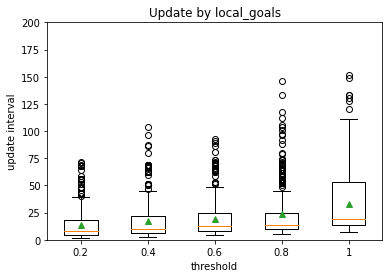

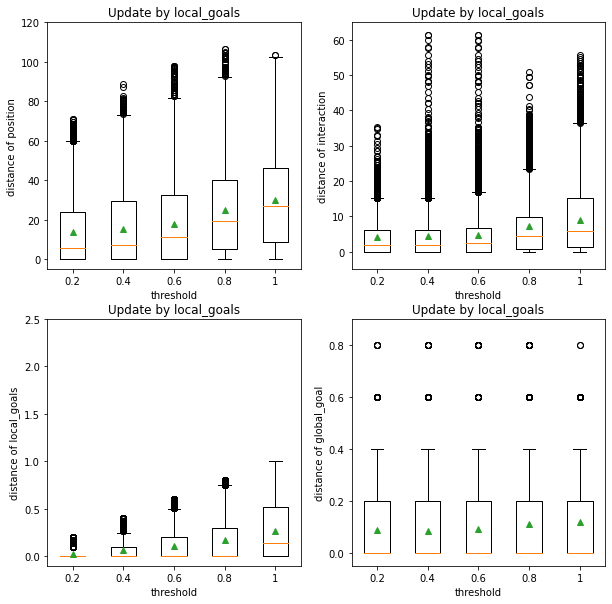

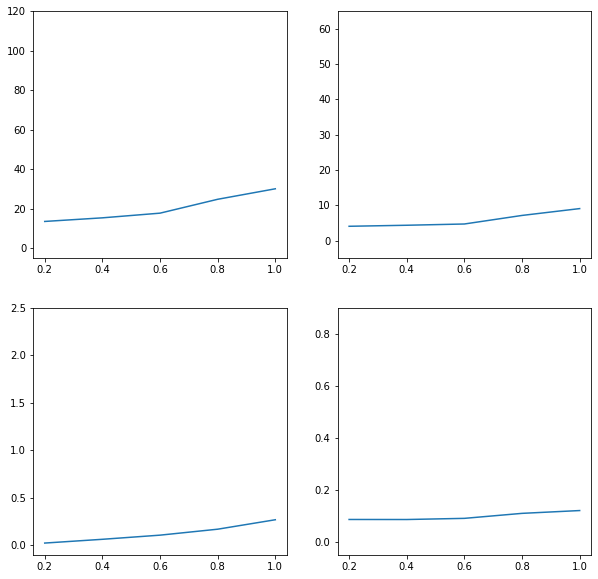

In [214]:
# update by local_goals distance
# analyse overhead for each threshold
compare_method = "local_goals"
human_seed_list = list(range(100, 1001, 100))
threshold_list = [0.2, 0.4, 0.6, 0.8,  1]

interval_data = []
for threshold in threshold_list:
    print("update intervals of threshold {}".format(threshold))

    dev_list = get_deviation_by_threshold(compare_method, threshold, human_seed_list)
    interval_list = list(map(calc_deviation_interval, dev_list))

    # concat all update intervals
    all_intervals = []
    for ii in interval_list:
        all_intervals += ii
    interval_data.append(all_intervals)

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('w')
ax1.set_title('Update by local_goals')
ax1.set_xticklabels(threshold_list)
ax1.set_xlabel('threshold')
ax1.set_ylabel('update interval')
ax1.set_ylim([0,200])
ax1.boxplot(interval_data, showmeans=True)
plt.savefig("./fig/{}_interval.pdf".format(compare_method))


# update by interaction distance
# analyse distance for each threshold
fig2, axs2 = plt.subplots(2,2, figsize=(10,10))
fig3, axs3 = plt.subplots(2,2, figsize=(10,10))

fig2.patch.set_facecolor('w')
fig3.patch.set_facecolor('w')

i = 0
for dist_type in compare_method_list:
    result_list = []

    for threshold in threshold_list:
        # time-series distances from all different seeds
        df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)

        # retrieve only a certain type of distance
        distance_list = [df[dist_type] for df in df_list]
        result = pd.concat(distance_list, axis=0)
        result_list.append(result)

    if dist_type == 'baseline':
        dist_type = 'position'
    axs2[i//2,i % 2].set_title('Update by local_goals')
    axs2[i//2,i % 2].set_xticklabels(threshold_list)
    axs2[i//2,i % 2].set_xlabel("threshold")
    axs2[i//2,i % 2].set_ylabel('distance of {}'.format(dist_type))
    axs2[i//2,i % 2].boxplot(result_list, showmeans=True)

    axs3[i//2,i % 2].plot(threshold_list, [df.mean() for df in result_list])
    i = i + 1
axs2[0,0].set_ylim([-5,120])
axs2[0,1].set_ylim([-5,65])
axs2[1,0].set_ylim([-0.1,2.5])
axs2[1,1].set_ylim([-0.05,0.9])

axs3[0,0].set_ylim([-5,120])
axs3[0,1].set_ylim([-5,65])
axs3[1,0].set_ylim([-0.1,2.5])
axs3[1,1].set_ylim([-0.05,0.9])
fig2.savefig("./fig/{}_distances.pdf".format(compare_method))



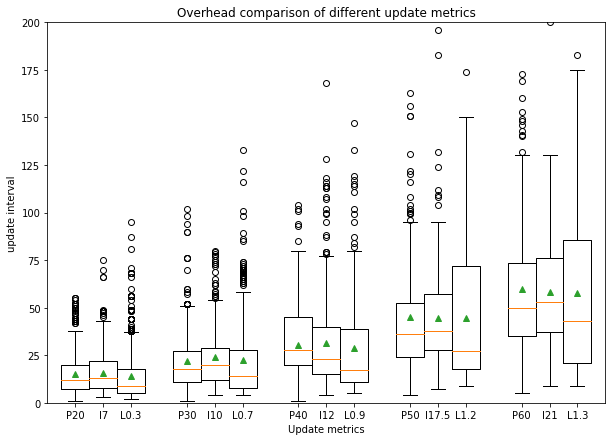

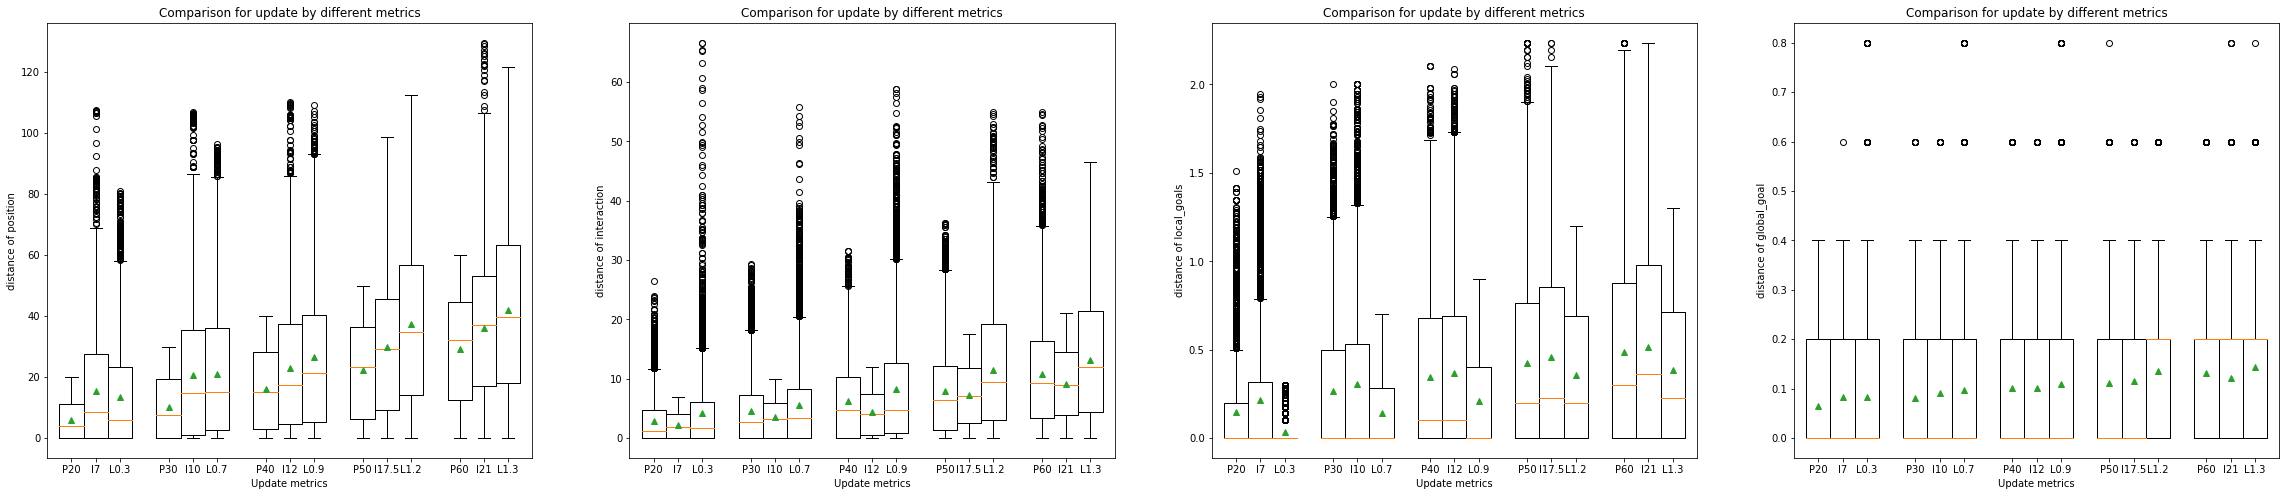

In [233]:
# update by three different metrics
# analyse overhead for each threshold
human_seed_list = list(range(100, 1001, 100))

th_list = dict(
    baseline = [20, 30, 40, 50, 60],
    interaction = [7, 10, 12, 17.5, 21],
    local_goals = [0.3, 0.7, 0.9, 1.2, 1.3])

left_positions = [-0.5, 1.5, 3.5, 5.5, 7.5]
middle_positions = [0, 2, 4, 6, 8]
right_positions = [0.5, 2.5, 4.5, 6.5, 8.5]


interval_pos = []
interval_inter = []
interval_lg = []
distance_pos = []
distance_inter = []
distance_lg = []

for compare_method in ['baseline', 'interaction', 'local_goals']:
    for threshold in th_list[compare_method]:

        # get update overhead/intervals
        dev_list = get_deviation_by_threshold(compare_method, threshold, human_seed_list)
        interval_list = list(map(calc_deviation_interval, dev_list))

        # get distance metrics and concat all
        df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)
        all_distances = pd.concat(df_list, axis=0)

        # concat all update intervals
        all_intervals = []
        for ii in interval_list:
            all_intervals += ii

        if compare_method == 'baseline':
            interval_pos.append(all_intervals)
            distance_pos.append(all_distances)
        elif compare_method == 'interaction':
            interval_inter.append(all_intervals)
            distance_inter.append(all_distances)
        elif compare_method == 'local_goals':
            interval_lg.append(all_intervals)
            distance_lg.append(all_distances)


fig1, ax1 = plt.subplots(figsize=(10,7))
fig1.patch.set_facecolor('w')
ax1.set_title('Overhead comparison of different update metrics')
ax1.set_ylabel('update interval')
ax1.set_xlabel('Update metrics')
ax1.set_ylim([0,200])

ax1.boxplot(interval_pos, positions=left_positions, showmeans=True)
ax1.boxplot(interval_inter, positions=middle_positions, showmeans=True)
ax1.boxplot(interval_lg, positions=right_positions, showmeans=True)

inter_labels = [ 'I' + str(item) for item in th_list['interaction']]
pos_labels = [ 'P' + str(item) for item in th_list['baseline']]
lg_labels = [ 'L' + str(item) for item in th_list['local_goals']]

ticks = []
labels = []
for i in range(len(inter_labels)):
    ticks.append(left_positions[i])
    ticks.append(middle_positions[i])
    labels.append(pos_labels[i])
    labels.append(inter_labels[i])
    if i < len(lg_labels):
        labels.append(lg_labels[i])
        ticks.append(right_positions[i])

plt.xticks(ticks, labels)

plt.savefig("./fig/intervals_xx.pdf")




fig2, ax2 = plt.subplots(1,4,figsize=(40,8))
fig2.patch.set_facecolor('w')

KPIs = ['baseline', 'interaction', 'local_goals', 'global_goal']
for i in range(len(KPIs)):
    KPI = KPIs[i]

    metric_distance_pos = [dis[KPI] for dis in distance_pos]
    metric_distance_inter = [dis[KPI] for dis in distance_inter]
    metric_distance_lg = [dis[KPI] for dis in distance_lg]

    if KPI == 'baseline':
        KPI = 'position'
    ax2[i].set_title('Comparison for update by different metrics')
    ax2[i].set_ylabel('distance of {}'.format(KPI))
    ax2[i].set_xlabel('Update metrics')

    ax2[i].boxplot(metric_distance_pos, positions=left_positions, showmeans=True)
    ax2[i].boxplot(metric_distance_inter, positions=middle_positions, showmeans=True)
    ax2[i].boxplot(metric_distance_lg, positions=right_positions, showmeans=True)
    ax2[i].set_xticks(ticks)
    ax2[i].set_xticklabels(labels)

fig2.savefig("./fig/distances_xx.pdf".format(compare_method))


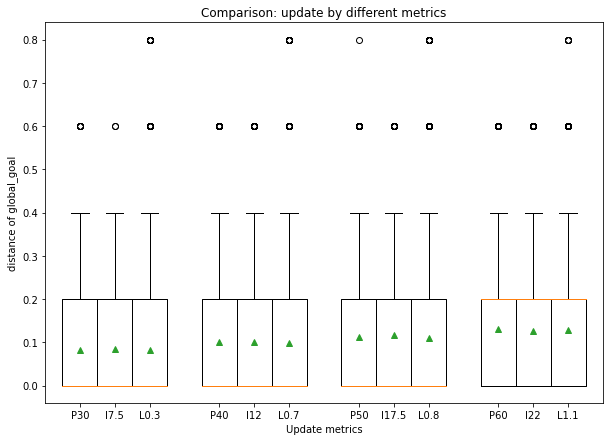

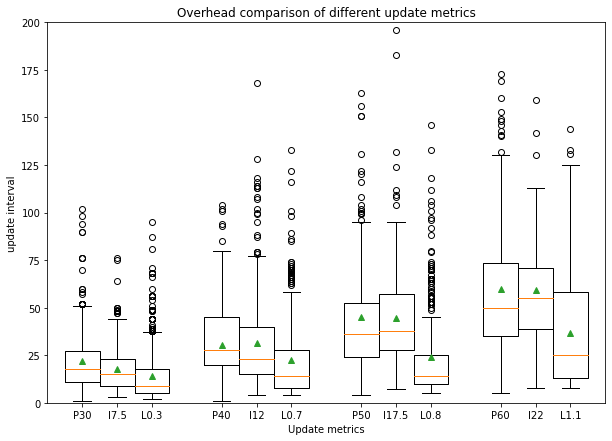

In [232]:
# update by three different metrics
# analyse overhead for each threshold
human_seed_list = list(range(100, 1001, 100))
th_list = dict(
    baseline = [30, 40, 50, 60],
    interaction = [7.5, 12, 17.5, 22],
    local_goals = [0.3, 0.7, 0.8, 1.1])

left_positions = [-0.5, 1.5, 3.5, 5.5]
middle_positions = [0, 2, 4, 6]
right_positions = [0.5, 2.5, 4.5, 6.5]

interval_pos = []
interval_inter = []
interval_lg = []
distance_pos = []
distance_inter = []
distance_lg = []

for compare_method in ['baseline', 'interaction', 'local_goals']:
    for threshold in th_list[compare_method]:

        # get update overhead/intervals
        dev_list = get_deviation_by_threshold(compare_method, threshold, human_seed_list)
        interval_list = list(map(calc_deviation_interval, dev_list))

        # get distance metrics and concat all
        df_list = get_statistics_by_threshold(compare_method, threshold, human_seed_list)
        all_distances = pd.concat(df_list, axis=0)

        # concat all update intervals
        all_intervals = []
        for ii in interval_list:
            all_intervals += ii

        if compare_method == 'baseline':
            interval_pos.append(all_intervals)
            distance_pos.append(all_distances)
        elif compare_method == 'interaction':
            interval_inter.append(all_intervals)
            distance_inter.append(all_distances)
        elif compare_method == 'local_goals':
            interval_lg.append(all_intervals)
            distance_lg.append(all_distances)


inter_labels = [ 'I' + str(item) for item in th_list['interaction']]
pos_labels = [ 'P' + str(item) for item in th_list['baseline']]
lg_labels = [ 'L' + str(item) for item in th_list['local_goals']]

ticks = []
labels = []
for i in range(len(inter_labels)):
    ticks.append(left_positions[i])
    ticks.append(middle_positions[i])
    labels.append(pos_labels[i])
    labels.append(inter_labels[i])
    if i < len(lg_labels):
        labels.append(lg_labels[i])
        ticks.append(right_positions[i])


fig2, ax2 = plt.subplots(figsize=(10,7))
fig2.patch.set_facecolor('w')

KPI = 'global_goal'

metric_distance_pos = [dis[KPI] for dis in distance_pos]
metric_distance_inter = [dis[KPI] for dis in distance_inter]
metric_distance_lg = [dis[KPI] for dis in distance_lg]

ax2.set_title('Comparison: update by different metrics')
ax2.set_ylabel('distance of {}'.format(KPI))
ax2.set_xlabel('Update metrics')

ax2.boxplot(metric_distance_pos, positions=left_positions, showmeans=True)
ax2.boxplot(metric_distance_inter, positions=middle_positions, showmeans=True)
ax2.boxplot(metric_distance_lg, positions=right_positions, showmeans=True)
ax2.set_xticks(ticks)
ax2.set_xticklabels(labels)

fig2.savefig("./fig/distances_yy.pdf".format(compare_method))




fig1, ax1 = plt.subplots(figsize=(10,7))
fig1.patch.set_facecolor('w')
ax1.set_title('Overhead comparison of different update metrics')
ax1.set_ylabel('update interval')
ax1.set_ylim([0,200])
ax1.set_xlabel('Update metrics')


ax1.boxplot(interval_pos, positions=left_positions, showmeans=True)
ax1.boxplot(interval_inter, positions=middle_positions, showmeans=True)
ax1.boxplot(interval_lg, positions=right_positions, showmeans=True)

plt.xticks(ticks, labels)

plt.savefig("./fig/intervals_yy.pdf")
